# Chapter 9: Unsupervised Learning Techniques

In [1]:
import numpy as np
import pandas as pd
import sklearn 

sklearn.__version__

'1.5.1'

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Clustering Algorithms: k-means and DBSCAN

### K-means

In [22]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
y_pred = kmeans.fit_predict(X)

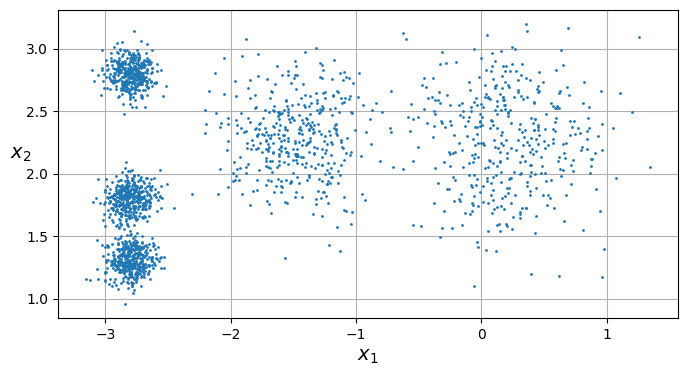

In [20]:

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [11]:
y_pred, y_pred is kmeans.labels_

(array([0, 0, 4, ..., 3, 1, 0]), True)

In [23]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [24]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

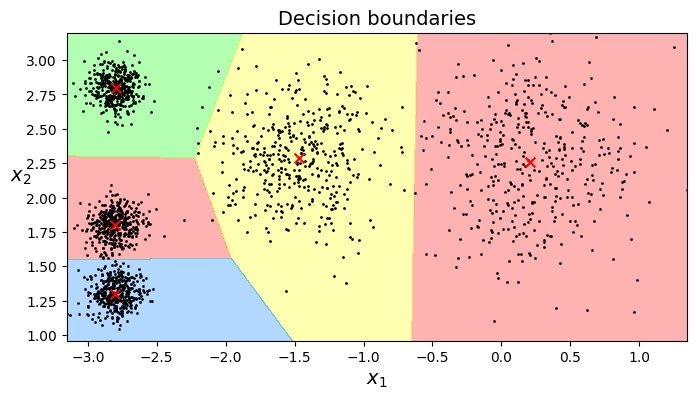

In [34]:
from matplotlib.colors import ListedColormap

# Clusters decision boundaries
def plot_data(X):
	plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2, zorder=-1)

	
def plot_decision_boundaries(clusterer, X, resolution=1000, custom_map=None, show_centroids=True):
	
	min_x1, max_x1 = X[:, 0].min(), X[:, 0].max()
	min_x2, max_x2 = X[:, 1].min(), X[:, 1].max()

	x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1, resolution), np.linspace(min_x2, max_x2, resolution))
	X_new = np.c_[x1.ravel(), x2.ravel()]

	y_pred = clusterer.predict(X_new).reshape(x1.shape)
	plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_map, zorder=-1)
	
	plot_data(X)

	if show_centroids:
		plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=50, marker='x', color='r', zorder=10)

	
custom_map = ListedColormap(['#ff6666', '#ffb366', '#ffff66', '#66ff66', '#66b3ff'])

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X, custom_map=custom_map)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title("Decision boundaries")
plt.show()

In [ ]:
# Distances to the centroids
# Clusters:  					C0, C1, C2, C3, C4
# Instances 1 - Distances: 		D0, D1, D2, D3, D4
# Instances 2 - Distances: 		D0, D1, D2, D3, D4
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 1.49, 2.9 , 2.89],
       [5.81, 2.8 , 4.48, 5.85, 5.84],
       [1.21, 3.29, 1.69, 0.29, 1.71],
       [0.73, 3.22, 1.55, 0.36, 1.22]])

In [38]:
kmeans.inertia_

211.5985372581684

### Accelerated k-means with MiniBatchKMeans

### Finding the optimal number of clusters

In [39]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

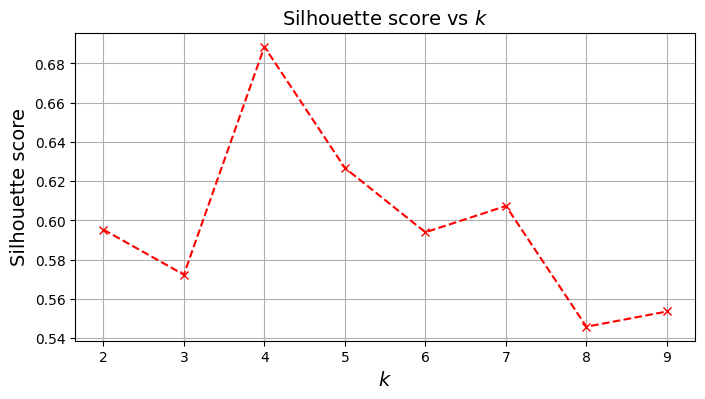

In [44]:
# Comparing silhouette scores for different values of k

silhouette_scores = []
for k in range(2, 10):
	kmeans = KMeans(n_clusters=k, random_state=42)
	kmeans.fit(X)

	silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "rx--")

plt.xlabel("$k$")
plt.ylabel("Silhouette score", rotation=90)
plt.title("Silhouette score vs $k$")
plt.grid()

plt.show()

### Limits of k-means